#Research Analyst Challenge

**Challenge:**
Demonstrate how mortality rates (M above) may change with climate change

**Given:** 
Mortality rate as a function of income

\begin{equation*}
M(T, I)   =  (\frac{6.2}{ln(I)}) * (0.1T^2  - 3.6*T + 32.4)
\end{equation*}

    where
    
    M Mortality rate (per 100, 000)
    T Daily max temperature (deg C)
    I Income per capita (in US $)


**Main Assumptions**
1. Over next 50 years, temperature at selected location will rise by 2 deg C (linear inc)
2. Over next 50 years, per capita income will double (linear inc)

Confirmed assuming linear increase for both 1&2 is fine with Michael D.

**Location:**
Seoul, Korea


## Data
1) <a href='https://en.wikipedia.org/wiki/Seoul'>Seoul Climate Data</a> from *Wikipedia*

Climate data for Seoul (normals 1981–2010, extremes 1907–present)

2) Seoul GDP per capital (in US$) from *The World Bank*

|year|GDP per capita($)|
|----|------------|
|2015|27,105.1|
|2016|27,538.81|

## Tasks
1. Load Seoul climate data as pandas dataframe **<span style="color:black; background-color: yellow">DONE</span>**.

2. Plot daily max temperature over 50 years, using Assumption 1 **<span style="color:black; background-color: yellow">DONE</span>**.
    (*Note*: chose July temperature in the climate data as baseline, and assumed linear increased over 50 years relative to that baseline)

3. Plot time series of GDP per capita over 50 years, using Assumption 2. (chose 2015 as baseline) **<span style="color:black; background-color: yellow">DONE</span>**.

4. Plot mortality over 50 years using data from 2&3 **<span style="color:black; background-color: yellow">DONE</span>**.

    
Status:
**<span style="color:black; background-color: yellow">DONE</span>**.
**<span style="color:white; background-color: green">In Progress</span>**.


In [223]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# Seoul climate data filepath 
data_filepath = os.path.abspath('./') + '/seoul_data.csv'

## DATA

In [212]:
# download csv
# Climate data for Seoul (normals 1981–2010, extremes 1907–present)
df_orig = pd.read_csv(data_filepath, nrows=3, header=1)

# excludes Year column
df = df_orig.iloc[:, 0:13]
df

gdp_2015 = 27105.1

In [189]:
# get record high temperature only (first row)
max_month_temp = df.iloc[0]

# get data only (no headers)
data_max_month_temp = max_month_temp[1:]
max_temps = data_max_month_temp.get_values()

max_temp = max_temps.max() #July

In [162]:
#seaborn
sns.set(color_codes=True)
x = np.linspace(1,12,12)

# month names, Jan to Dec
# excludes first and last items, 'Month' and 'Year'
month_names = df.columns.values[1:]
month_names
month_nums= xrange(1,13,1) # [1,...,12]

In [149]:
# 12 == 12
len(max_temps) == len(month_names)

True

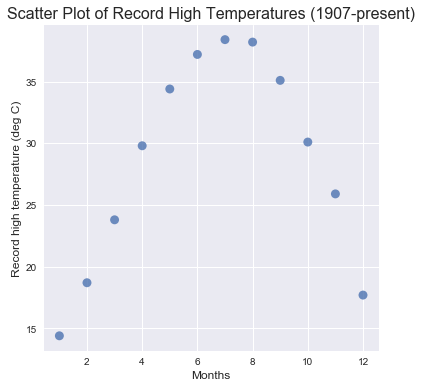

In [234]:
# transpose df for plotting
df_t = df.T

#df_t.size()

def label_axes(_plt, x_lab, y_lab, title):
    _plt.xlabel(x_lab,  fontsize=12)
    _plt.ylabel(y_lab, fontsize=12)
    _plt.title(title, fontsize=16)
    
def plot_series(_plt, _x, _y):
    _plt.close()
    _plt.figure(figsize=(6, 6))
    _plt.scatter(_x, _y, s=80, edgecolor='', alpha=0.8)
    
plot_series(plt, month_nums, max_temps)
label_axes(plt, 'Months', 
           'Record high temperature (deg C)', 
           'Scatter Plot of Record High Temperatures (1907-present)')
plt.show()

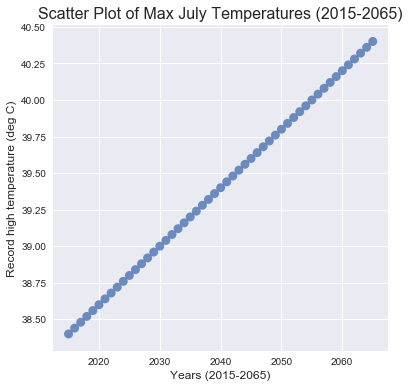

In [239]:
years = range(2015, 2065+1, 1) # 51 years includong 2015
temp_inc = lambda t: (2/50.0)*(t-2015) + max_temp # max_temp is the starting baseline, July temperature
max_temp_50 = map(temp_inc, years)

len(t) == len(max_temp_50)

plot_series(plt, years, max_temp_50)
label_axes(plt, 
           'Years (2015-2065)',
           'Record high temperature (deg C)',
           'Scatter Plot of Max July Temperatures (2015-2065)')
plt.show()         

# 3-Plot GDP increase over 50 years 
Assumptions: 
- 2015 GDP doubles by 2065
- GDP increases linearly

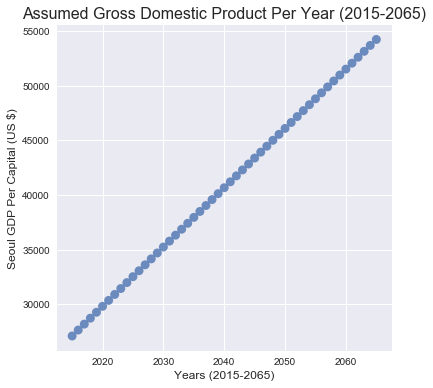

In [258]:
# use years for x-axis again
gdp_2065=2*gdp_2015
gdp_inc = lambda t: ((gdp_2065-gdp_2015)/ 50) * (t-2015) + gdp_2015
# use gdp_2015 as baseline
gdp_50 = map(gdp_inc, years)

len(t) == len(gdp_50)

plot_series(plt, years, gdp_50)
label_axes(plt, 
    'Years (2015-2065)',
    'Seoul GDP Per Capital (US $)',
    'Assumed Gross Domestic Product Per Year (2015-2065)')
plt.show()

In [256]:
gdp_inc_50[0] == gdp_50[-1]/2.0

False

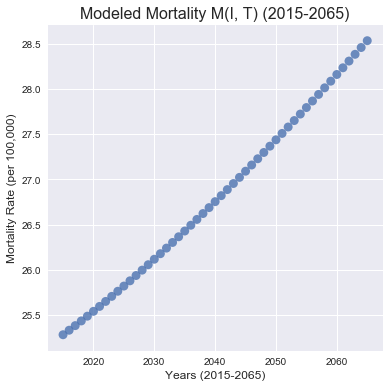

In [259]:
#mortality_fn_simple = lambda I, T:(6.2/math.log(I))*(0.1*T**2)
mortality_fn = lambda I, T:(6.2/math.log(I))*(0.1*T**2-3.6*T + 32.4)

mortality_50 = map(mortality_fn, gdp_50, max_temp_50)

plot_series(plt, years, mortality_50)

label_axes(plt, 
    'Years (2015-2065)',
    'Mortality Rate (per 100,000)',
    'Modeled Mortality M(I, T) (2015-2065)')
plt.show()

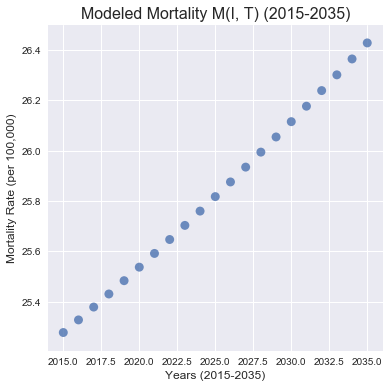

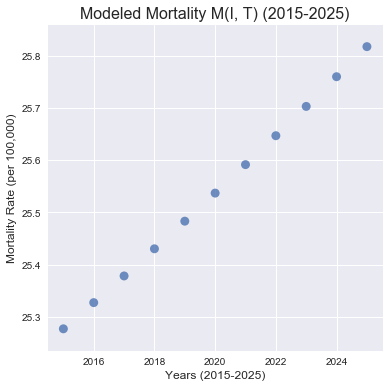

In [262]:
plot_series(plt, years[0:21], mortality_50[0:21])

label_axes(plt, 
    'Years (2015-2035)',
    'Mortality Rate (per 100,000)',
    'Modeled Mortality M(I, T) (2015-2035)')
plt.show()

plot_series(plt, years[0:11], mortality_50[0:11])

label_axes(plt, 
    'Years (2015-2025)',
    'Mortality Rate (per 100,000)',
    'Modeled Mortality M(I, T) (2015-2025)')
plt.show()

In [252]:
m_2065 = mortality_50[-1]
m_2015 = mortality_50[0]
print ('Mortality rate (per 100k) at {0}: ${1}').format(2015, m_2015)
print ('Mortality rate (per 100k) at {0}: ${1}').format(2065, m_2065)
print('Mortality increased by {} (per 100k people) over 50 years.'.format(m_2065 - m_2015))

Mortality rate (per 100k) at 2015: $25.2774701744
Mortality rate (per 100k) at 2065: $28.5388423342
Mortality increased by 3.26137215976 (per 100k people) over 50 years.


# Conclusion

Mortality rate in Seoul will increase at a slow quadratic rate due to rise in temperature.

## Questions:

• What sorts of **assumptions** did we make, and how do you think this affects the analysis?

1. Assumed mortality equation is valid, and that other factors that affect mortality are negligible. Assumed this equation is valid for all locations (independent of location and time period)
2. Assumed linear increase in temperature and total increase by 2 deg C
3. Assumed that increase in 2 deg C of temperature leads to same increase (2 deg C) for 'Record high' temperatures. This is flawed, as a) it's unknown which years the record high temperature values occured. b) it's unlikely for max record temperature (highest deviance from average monthly temeprature over 1981-2010 years) increases at the same rate as average daily temperature
4. Used GDP per capita as income per capita
5. Assumed that record high temperature values over 1981-2010 normals can be used as a baseline against which temperature increases by 2 deg C. It's unknown which years the record high temperature values occured.
6. Assumed linear increse in GDP (and GDP represents income per capita), and doubling compared to reference date of 2015

• How would the results change if we use different assumptions about growth and warming?
ex. assume 1.5 deg C warming
ex. assume other economic growth (research some standard pathways)

Because $T^2$ over-powers $ln(I)$, mortality increases as temperature increases. Although rising $I$ retards the rate of increase of mortality rate, the offset seems to be very slight and only initially. Higher rate of increase of I will slow down increase in mortality, and lower rate of increase of I will lead to faster increase in mortality. Higher temperature increase will lead to even faster rate of mortality in crease. Therefore, based on current equation, it seems unlikely that income increase is able to offset temperature increase at least for temperature increase of 2 deg celsius.

• How might you improve this analysis given more time?
1. Use predicted temperature data from climate models. Do research on which climate model/s to use, and how choice of climate model output will affect my results. Or use a range of predicted temperatures.
2. Consider usage of economic models that predict per capita income 
3. Provide sensitivity analysis/error range (how?)

• What follow-on work would you like to do with this data?

Ideas:
1. Try temperature increase of 1.5 deg C to see how mortality increase is affected
2. Use real predicted temperature data based on a chosen climate model (will take time to reserach which climate model is reliable for Seoul location). Also research how recorded max temperatures have changed over time versus recorded average temperatures to see if representation of temperature can be improved.
3. But, utility of this analysis really depends on the accuracy of mortality equation for the chosen location. Thus, further data analysis isn't useful if mortality equation isn't very sound.
4. Make a mortality plot that uses both the max and min recorded temperature to cover the mortality range per year.
5. Re-produce plots with seaborn, and explore tools for faster analysis and nicer looking plots.

• Why did you choose to use the tools you used? What trade-offs/benefits were involved in your choice? (speed/ease is a totally valid answer)

I used excel to clean and save climate data, and Python/pandas/etc. to plot.
1. Excel-It was easiest to copy and paste wikipedia data to excel, and remove unnecessary rows
2. Python/Jupyter Notebook-For familiarity with Python, ease of simple documentation (great for sharing), and to reference or re-use existing code from previous project
3. To learn how to plot simple timeseries using seaborn